#### 다중분류를 위한 OvR(OvA)
- 분류 클래스 수 만큼 2진 분류기를 생성하여 다중 분류를 진행

[1] 모듈로딩

In [70]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

[2] 데이터 준비

- 데이터 셋 load_digits
    * 내장 데이터셋
    * 이미지 데이터셋 => 8 * 8 크기 이미지
    * 이미지 라벨/타겟 => 숫자 0~9까지 측, 층 10개 클래스

In [71]:
# 타겟 피쳐 설정
featureDF, targetSR = load_digits(as_frame=True, return_X_y=True)

# 이미지 픽셀 : 0 ~ 255 범위
featureDF = featureDF/255  ## 스케일링 해주는것


print(featureDF.shape, featureDF.ndim, targetSR.shape, targetSR.ndim)

(1797, 64) 2 (1797,) 1


In [72]:
featureDF.head(1), targetSR.head()

(   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
 0        0.0        0.0   0.019608    0.05098   0.035294   0.003922   
 
    pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
 0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
 
    pixel_7_0  pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  \
 0        0.0        0.0   0.023529    0.05098   0.039216        0.0   
 
    pixel_7_6  pixel_7_7  
 0        0.0        0.0  
 
 [1 rows x 64 columns],
 0    0
 1    1
 2    2
 3    3
 4    4
 Name: target, dtype: int32)

In [73]:
single_row = featureDF.iloc[0].values

In [74]:
# 8, 8 로 나누기
image_matrix = single_row.reshape(8, 8)

In [75]:
print(image_matrix)

[[0.         0.         0.01960784 0.05098039 0.03529412 0.00392157
  0.         0.        ]
 [0.         0.         0.05098039 0.05882353 0.03921569 0.05882353
  0.01960784 0.        ]
 [0.         0.01176471 0.05882353 0.00784314 0.         0.04313725
  0.03137255 0.        ]
 [0.         0.01568627 0.04705882 0.         0.         0.03137255
  0.03137255 0.        ]
 [0.         0.01960784 0.03137255 0.         0.         0.03529412
  0.03137255 0.        ]
 [0.         0.01568627 0.04313725 0.         0.00392157 0.04705882
  0.02745098 0.        ]
 [0.         0.00784314 0.05490196 0.01960784 0.03921569 0.04705882
  0.         0.        ]
 [0.         0.         0.02352941 0.05098039 0.03921569 0.
  0.         0.        ]]


In [76]:
import matplotlib.pyplot as plt

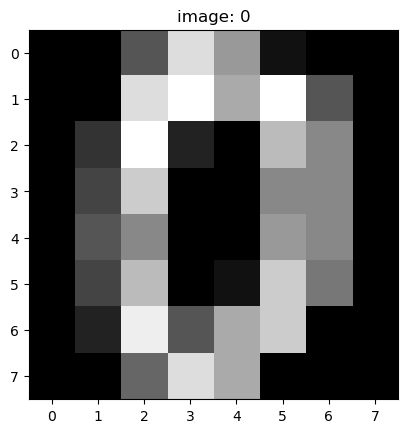

In [77]:
plt.imshow(image_matrix, cmap='gray')
plt.title(f'image: {targetSR.iloc[0]}')
plt.show()

(8, 8)


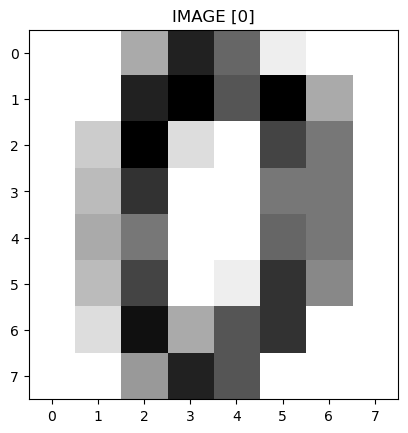

In [78]:
imgData=featureDF.iloc[0].to_numpy().reshape(-1,8)
print(imgData.shape)

# 시각화
plt.imshow(imgData, cmap='binary')
plt.title(f'IMAGE [{targetSR[0]}]')
plt.show()

[3] 학습 준비 : trainDS, testDS

In [79]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, stratify=targetSR, random_state=10)

In [80]:
featureDF.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.00000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.001192,0.020411,0.046415,0.046463,0.022674,0.005342,0.000508,0.000022,0.007819,...,0.014608,0.00081,0.000002,0.001096,0.021794,0.047408,0.046310,0.026526,0.008109,0.001429
std,0.0,0.003558,0.018646,0.016662,0.016813,0.022221,0.013042,0.004068,0.000369,0.012534,...,0.019292,0.00386,0.000093,0.003664,0.020012,0.017156,0.019349,0.023140,0.016041,0.007295
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.003922,0.039216,0.039216,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.003922,0.043137,0.039216,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.015686,0.050980,0.050980,0.015686,0.000000,0.000000,0.000000,0.000000,...,0.003922,0.00000,0.000000,0.000000,0.015686,0.050980,0.054902,0.023529,0.000000,0.000000
75%,0.0,0.000000,0.035294,0.058824,0.058824,0.043137,0.000000,0.000000,0.000000,0.011765,...,0.027451,0.00000,0.000000,0.000000,0.039216,0.062745,0.062745,0.047059,0.007843,0.000000
max,0.0,0.031373,0.062745,0.062745,0.062745,0.062745,0.062745,0.058824,0.007843,0.062745,...,0.062745,0.05098,0.003922,0.035294,0.062745,0.062745,0.062745,0.062745,0.062745,0.062745


[4] 모델 생성
- OvR(Over vs Rest) 또는 OvA(Over vs All)
- 클래스 마다 이진 분류기 만들어서 가장 높은 결정점수 낸 클래스 선택

In [81]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [82]:
# 모델 파라미터
print(f'ovr_clf.estimators_: {len(ovr_clf.estimators_)}개')
print(f'ovr_clf.classes_ : {ovr_clf.classes_}')
print(f'ovr_clf.n_classes_: {ovr_clf.n_classes_}')
print(f'ovr_clf.label_binarizer_ : {ovr_clf.label_binarizer_ }')

ovr_clf.estimators_: 10개
ovr_clf.classes_ : [0 1 2 3 4 5 6 7 8 9]
ovr_clf.n_classes_: 10
ovr_clf.label_binarizer_ : LabelBinarizer(sparse_output=True)


In [83]:
for idx in range(ovr_clf.n_classes_):
    print(f'[{idx} 분류기]', ovr_clf.estimators_[idx].coef_, ovr_clf.estimators_[idx].intercept_)

[0 분류기] [[ 0.00000000e+00 -1.17211304e-01 -3.61976716e-01  6.37992922e-01
  -2.59516080e-01 -1.28004235e+00 -5.49554643e-01 -5.15394269e-02
  -2.48867098e-03 -4.50770969e-01  8.75529916e-01  6.75669778e-01
   7.61063082e-01  1.42181524e+00 -3.72707245e-01 -4.79082752e-02
  -8.76059290e-04  4.83967023e-01  1.73526178e+00 -5.66661564e-01
  -1.82795465e+00  2.02796255e+00  6.80700634e-01 -2.29999080e-02
  -2.33809952e-04  1.17166680e+00  1.43124099e+00 -2.77339186e+00
  -4.06945241e+00  6.21786489e-01  1.75117326e+00 -1.03944146e-03
   0.00000000e+00  1.44042261e+00  1.66074394e+00 -3.35466822e+00
  -4.16837941e+00 -1.82033356e-01  1.70005379e+00  0.00000000e+00
  -6.22709065e-03  7.53400694e-01  2.70397833e+00 -2.23501260e+00
  -2.41565152e+00  1.07409288e+00  9.19098746e-01 -1.27278179e-02
  -1.92354211e-03  2.32108843e-02  2.27842435e+00  3.91210660e-01
   5.69341433e-01  1.80144114e+00 -6.51051162e-01 -7.93462636e-02
  -3.44895266e-04 -1.12691963e-01 -5.45168374e-01  6.15148191e-01
  

In [99]:
ovr_clf.decision_function(X_test.iloc[:1])

array([[-2.46014186, -2.47293224, -2.0164841 , -1.43658085, -3.02068395,
        -2.12855139, -2.40297413, -2.58965629, -2.30415988, -1.84340565]])

In [100]:
ovr_clf.predict_proba(X_test.iloc[:1])

array([[0.0787733 , 0.07785004, 0.11759237, 0.19225415, 0.04654342,
        0.10645157, 0.08302338, 0.06987207, 0.09086352, 0.13677619]])

In [101]:
ovr_clf.predict(X_test.iloc[:1])

array([3])

In [121]:
y_test1 = y_test.reset_index(drop=True)

(8, 8)


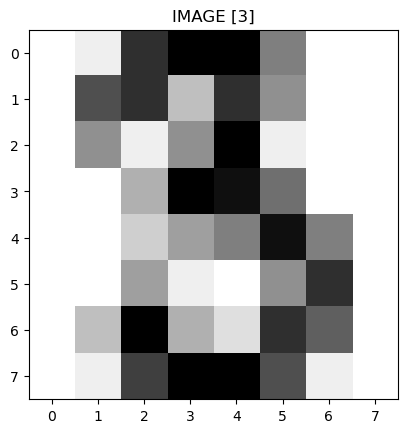

In [122]:
imgData=X_test.iloc[0].to_numpy().reshape(-1,8)
print(imgData.shape)

# 시각화
plt.imshow(imgData, cmap='binary')
plt.title(f'IMAGE [{y_test1[0]}]')
plt.show()